<a href="https://colab.research.google.com/github/gk442161/subjectivity_classifier/blob/master/Main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import pandas as pd
import numpy as np

In [ ]:
# !wget http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

In [ ]:
# import zipfile

# BASE_DIR = ''
# GLOVE_ZIP_FILE_PATH = os.path.join(BASE_DIR,'/content/drive/My Drive/Colab Notebooks/glove.6B.zip')  

#---------------------------------------------------------------------------------------------------------------#
                  # UNCOMMENT BELOW IF ABOVE DON'T WORK AND COMMENT ABOVE ONE
#---------------------------------------------------------------------------------------------------------------#
# ! wget http://nlp.stanford.edu/data/glove.6B.zip   
# GLOVE_ZIP_FILE_PATH = os.path.join(BASE_DIR,'glove.6B.zip')


#---------------------------------------------------------------------------------------------------------------#
# STANFORD_DATASET_PATH = os.path.join(BASE_DIR,'trainingandtestdata.zip')

# zip_ref = zipfile.ZipFile(STANFORD_DATASET_PATH, 'r')
# zip_ref.extractall('stfd_dataset')
# zip_ref.close()

# zip_ref = zipfile.ZipFile(GLOVE_ZIP_FILE_PATH, 'r')
# zip_ref.extractall('glove.6B')
# zip_ref.close()


# STFD_DIR = os.path.join(BASE_DIR , 'stfd_dataset')
# GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')

In [ ]:

# os.mkdir('sub-v-obj')
# !cp '/content/drive/My Drive/Final year project/Datasets/training.csv' 'sub-v-obj'

# UPLOAD TRAINING.CSV FILE IN sub-v-obj folder 

# TEXT_DATA_DIR = os.path.join(BASE_DIR, 'sub-v-obj')

# embeddings_index = {}
# with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt')) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, 'f', sep=' ')
#         embeddings_index[word] = coefs

In [ ]:


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



EMBEDDING_MATRIX_PATH = '/content/drive/MyDrive/Final year project/Datasets/Embedding/main_embedding_matrix_pickle'
MAX_SEQUENCE_LENGTH = 1000   
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
TRUNCAT_TYPE = 'post'
PADDING_TYPE = 'post'
oov_tok = "<OOV>"  # OUT OF VOCABLARY

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token=oov_tok)

# TODO insert dataset in tokenizer to fit it
embedding_df= pd.read_pickle(EMBEDDING_MATRIX_PATH)
tokenizer.fit_on_texts(embedding_df.columns)
word_index = tokenizer.word_index
embeddings_index = embedding_df.to_dict('list')



In [ ]:
del embedding_df

In [ ]:
# from pandas_tfrecords import pd2tf, tf2pd
# pd2tf(d, '/content/drive/MyDrive/Final year project/Datasets/main_data/tfrecord')

In [ ]:
data_features = pd.read_pickle('/content/drive/MyDrive/Final year project/Datasets/main_data/main_data_pickle',compression='gzip')
data_labels = data_features.pop('sentiment')
# data_features = data_features.pop('sentence')
del data_features

data_labels = data_labels.to_numpy()
data_labels = data_labels.reshape(1607264)

from keras.utils.np_utils import to_categorical   
categorical_labels = to_categorical(data_labels, num_classes=11)

In [ ]:
# tokenized_data = tokenizer.texts_to_sequences(data_features)
# padded_data= pad_sequences(tokenized_data,maxlen=MAX_SEQUENCE_LENGTH,padding=PADDING_TYPE,truncating=TRUNCAT_TYPE)


padded_data = np.load('/content/drive/MyDrive/Final year project/Datasets/main_data/padded_main_data_npy.npy','r')

In [ ]:
# np.save('/content/drive/MyDrive/Final year project/Datasets/main_data/padded_main_data_npy',padded_data,False)


In [ ]:
#---------------------------------------------------------------------------------------------------------------#
                                                # UNDER EVALUATION
#---------------------------------------------------------------------------------------------------------------#
# BATCH_INTAKE = 100000
# from tensorflow.data import Dataset
# main_ds = Dataset.from_tensor_slices((np.array(padded_data)[:BATCH_INTAKE], data_labels[:BATCH_INTAKE]),)
# main_ds = main_ds.shuffle(1000, reshuffle_each_iteration=True)
# main_ds = main_ds.batch(1000)
# main_ds = main_ds.prefetch(100)


In [ ]:
# from tensorflow.data import Dataset
# training_ds = Dataset.from_tensor_slices((np.array(training_padded), np.array(y_train)),)
# training_ds = training_ds

In [ ]:
# Create Embedding metrix for Embedding layer
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras import layers , Input, Model , optimizers ,losses

In [ ]:
from tensorflow.keras.initializers import Constant


# Define Embedding layer
embedding_layer = layers.Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

# TRAINING THE **MODEL**

In [ ]:


import matplotlib.pyplot as plt

# model = tf.keras.models.Sequential()
# model.add(tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH ,),dtype='float64'))
# model.add(embedding_layer)
# model.add(tf.keras.layers.Conv3D(12,(3,3,3),activation='relu'))
# embedd = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)(word_input)
# cnn  = tf.keras.layers.Conv3D(12,(3,3,3),activation='relu')(embedding_L)
# max_pool = tf.keras.layers.MaxPool3D((2,2))
# flat = tf.keras.layers.Flatten()(embedding_L)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(GA)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)



def train_model(input_ds,output_ds, n_epoch = 50 , n_batch_size=None,call_back=None,validation_data=None):
  # Starting the sequence
  word_input=Input(shape=(None ,),dtype='int64') 
  embedding_L =embedding_layer(word_input)
  GA = layers.GlobalAveragePooling1D()(embedding_L)

  # CNN layers
  x = layers.Conv1D(128, 5, activation="relu")(embedding_L)
  x = layers.MaxPooling1D(5)(x)
  # x = layers.Conv1D(128, 5, activation="relu")(x)
  # x = layers.MaxPooling1D(5)(x)
  # x = layers.Conv1D(64, 3, activation="relu")(x)
  # x = layers.MaxPooling1D(3)(x)

  # Define Separate model For LSTM and GRU Than merge it

  lstm =layers.LSTM(64,return_sequences=True)(x)
  gru = layers.GRU(64,go_backwards=True,return_sequences=True)(x)
  concatenated = layers.Concatenate()([lstm,gru])

  lstm =layers.LSTM(64,return_sequences=True)(concatenated)
  gru = layers.GRU(64,go_backwards=True,return_sequences=True)(concatenated)
  concatenated = layers.Concatenate()([lstm,gru])

  # Follow the Sequence inputing merged layer to x

  GM = layers.GlobalMaxPooling1D()(concatenated)

  # Dense Layers
  d = layers.Dense(256, activation="relu")(GM)
  d = layers.Dense(128, activation='relu' )(d)
  d = layers.Dense(64, activation='relu')(d)
  d = layers.Dense(32, activation='relu')(d)
  d = layers.Dropout(0.5)(d)
  ouput = layers.Dense(11 ,activation='softmax')(d)  # 11 for 0 to 10 classes

  model = Model(word_input,ouput)


                        # Define learning rate for analysis purpose

# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=1,
#     decay_rate=0.9)

# Learning obtained after analysis of trained model
# ==> (1e-2)*0.9**20

                        # Define Optimizer and Compile it 
  opt = optimizers.Adam(learning_rate=(1e-2)*0.9**20)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
  
  history = model.fit(input_ds,output_ds,epochs=n_epoch, verbose=1,batch_size=n_batch_size,callbacks=call_back,validation_data=validation_data)
  plt.plot(history.history['accuracy'],'g--', label='accuracy')
  plt.plot(history.history['val_accuracy'],'b--', label='val accuracy')
  plt.plot(history.history['val_loss'],'r', label='val loss')
  plt.plot(history.history['loss'], 'y',label='loss')
  plt.legend()
  plt.title('batch-size='+str(n_batch_size), pad=-40)
  return model
# model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint ,EarlyStopping

                      # define the checkpoint

MODEL_FILE_PATH = os.path.join('/content/drive/MyDrive/Final year project','model_main.h5')

stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=1,
    mode='min', baseline=None, restore_best_weights=True
    )

checkpoint = ModelCheckpoint(MODEL_FILE_PATH, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,stopping]

In [ ]:
#---------------------------------------------------------------------------------------------------------------#
                                # Analysing for Batch Size
#---------------------------------------------------------------------------------------------------------------#

# batch_size = [ 16, 32, 64, 128]
# for i in range(len(batch_size)):
# 	# determine the plot number
# 	plot_no = 420 + (i+1)
# 	plt.subplot(plot_no)
# 	# fit model and plot learning curves for a batch size
# 	train_model(te, n_batch_size=batch_size[i],n_epoch=10,validation_data=(testing_padded,y_test))
# # show learning curves
# plt.show()

Epoch 1/12
3125/3125 [==============================] - 244s 77ms/step - loss: 0.7485 - accuracy: 0.5416 - val_loss: 0.5079 - val_accuracy: 0.7520

Epoch 00001: loss did not improve from 0.45682
Epoch 2/12
3125/3125 [==============================] - 240s 77ms/step - loss: 0.5261 - accuracy: 0.7489 - val_loss: 0.4828 - val_accuracy: 0.7660

Epoch 00002: loss did not improve from 0.45682
Epoch 3/12
3125/3125 [==============================] - 240s 77ms/step - loss: 0.4937 - accuracy: 0.7680 - val_loss: 0.4648 - val_accuracy: 0.7720

Epoch 00003: loss did not improve from 0.45682
Epoch 4/12
3125/3125 [==============================] - 240s 77ms/step - loss: 0.4752 - accuracy: 0.7800 - val_loss: 0.4626 - val_accuracy: 0.7755

Epoch 00004: loss did not improve from 0.45682
Epoch 5/12
3125/3125 [==============================] - 241s 77ms/step - loss: 0.4594 - accuracy: 0.7889 - val_loss: 0.4613 - val_accuracy: 0.7825

Epoch 00005: loss did not improve from 0.45682
Epoch 6/12
3125/3125 [===

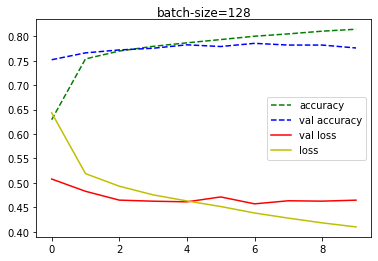

In [26]:
BATCH_INTAKE = 400000
VALIDATION_INTAKE = 2000
BATCH_SIZE = 128
EPOCH = 12

trained_model= train_model(padded_data[:BATCH_INTAKE],categorical_labels[:BATCH_INTAKE], n_batch_size=BATCH_SIZE,n_epoch=EPOCH,call_back=callbacks_list,
                           validation_data=(padded_data[-VALIDATION_INTAKE:],categorical_labels[-VALIDATION_INTAKE:]))


In [27]:
result = trained_model.evaluate(padded_data[BATCH_INTAKE:100+BATCH_INTAKE],categorical_labels[BATCH_INTAKE:100+BATCH_INTAKE])
result

4/4 [==============================] - 0s 26ms/step - loss: 0.5154 - accuracy: 0.7300


[0.5154318809509277, 0.7300000190734863]

In [28]:
text = ["I am sad","I am happy","this boy is bad"]
text_seq = tokenizer.texts_to_sequences(text)
text_padded = pad_sequences(text_seq, maxlen=MAX_SEQUENCE_LENGTH, padding=PADDING_TYPE, truncating=TRUNCAT_TYPE)
pred_val=trained_model.predict(text_padded)
pred_val=np.array(list(map(lambda x: x.argmax(),pred_val)))
print('predicted sentiment',pred_val)

predicted sentiment [ 0 10  0]


# **ONLY FOR LOADING AND TRAINING**

In [29]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import models
MODEL_FILE_PATH = '/content/drive/MyDrive/Final year project/model_main.h5'
UPDATED_MODEL_FILE_PATH = '/content/drive/MyDrive/Final year project/updated_model_main.h5'

# load the model
loaded_model = models.load_model(MODEL_FILE_PATH)


# fit the model
stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=1,
    mode='min', baseline=None, restore_best_weights=True
    )

checkpoint = ModelCheckpoint(UPDATED_MODEL_FILE_PATH, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,stopping]


In [30]:
text = ["I am sad","You are good person","this boy is bad"]
text_seq = tokenizer.texts_to_sequences(text)
text_padded = pad_sequences(text_seq, maxlen=MAX_SEQUENCE_LENGTH, padding=PADDING_TYPE, truncating=TRUNCAT_TYPE)
pred_val=loaded_model.predict(text_padded)
pred_val=np.array(list(map(lambda x: x.argmax(),pred_val)))
print('predicted sentiment',pred_val)

predicted sentiment [ 0 10  0]


In [31]:
START_BATCH_INTAKE = 400000
END_BATCH_INTAKE   = 800000
VALIDATION_INTAKE  = 5000
BATCH_SIZE = 128
EPOCH = 12
history= loaded_model.fit(padded_data[START_BATCH_INTAKE:END_BATCH_INTAKE ],
                          categorical_labels[START_BATCH_INTAKE:END_BATCH_INTAKE ],
                          validation_data=(padded_data[-VALIDATION_INTAKE:],
                                           categorical_labels[-VALIDATION_INTAKE:]),
                          batch_size= BATCH_SIZE,
                          epochs=EPOCH, callbacks=callbacks_list)

Epoch 1/12
3125/3125 [==============================] - 260s 77ms/step - loss: 0.4909 - accuracy: 0.7701 - val_loss: 0.4671 - val_accuracy: 0.7746

Epoch 00001: loss improved from inf to 0.49086, saving model to /content/drive/MyDrive/Final year project/updated_model_main.h5
Epoch 2/12
3125/3125 [==============================] - 235s 75ms/step - loss: 0.4727 - accuracy: 0.7795 - val_loss: 0.4674 - val_accuracy: 0.7794

Epoch 00002: loss improved from 0.49086 to 0.47268, saving model to /content/drive/MyDrive/Final year project/updated_model_main.h5
Epoch 3/12
3125/3125 [==============================] - 235s 75ms/step - loss: 0.4593 - accuracy: 0.7871 - val_loss: 0.4664 - val_accuracy: 0.7768

Epoch 00003: loss improved from 0.47268 to 0.45926, saving model to /content/drive/MyDrive/Final year project/updated_model_main.h5
Epoch 4/12
3125/3125 [==============================] - 232s 74ms/step - loss: 0.4471 - accuracy: 0.7938 - val_loss: 0.4643 - val_accuracy: 0.7802

Epoch 00004: los

Text(0.5, 1.0, 'BATCH SIZE - 128')

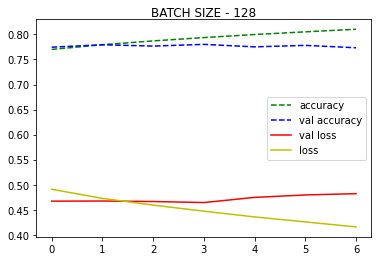

In [35]:
 import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'g--', label='accuracy')
plt.plot(history.history['val_accuracy'],'b--', label='val accuracy')
plt.plot(history.history['val_loss'],'r', label='val loss')
plt.plot(history.history['loss'], 'y',label='loss')
plt.legend()
plt.title('BATCH SIZE - '+str(BATCH_SIZE), pad=-40)

In [39]:

UPDATED_MODEL_FILE_PATH_2 = '/content/drive/MyDrive/Final year project/updated_model_main_2.h5'

# fit the model
stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=2,
    mode='min', baseline=None, restore_best_weights=True
    )

checkpoint = ModelCheckpoint(UPDATED_MODEL_FILE_PATH_2, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,stopping]

In [40]:
START_BATCH_INTAKE = 1200000
END_BATCH_INTAKE   = 1600000
VALIDATION_INTAKE  = 5000
BATCH_SIZE = 32
EPOCH = 12
history= loaded_model.fit(padded_data[START_BATCH_INTAKE:END_BATCH_INTAKE ],
                          categorical_labels[START_BATCH_INTAKE:END_BATCH_INTAKE ],
                          validation_data=(padded_data[-VALIDATION_INTAKE:],
                                           categorical_labels[-VALIDATION_INTAKE:]),
                          batch_size= BATCH_SIZE,
                          epochs=EPOCH, callbacks=callbacks_list)

Epoch 1/12
12500/12500 [==============================] - 460s 36ms/step - loss: 0.4860 - accuracy: 0.7734 - val_loss: 0.4608 - val_accuracy: 0.7844

Epoch 00001: loss improved from inf to 0.48605, saving model to /content/drive/MyDrive/Final year project/updated_model_main_2.h5
Epoch 2/12
12500/12500 [==============================] - 433s 35ms/step - loss: 0.4722 - accuracy: 0.7805 - val_loss: 0.4604 - val_accuracy: 0.7858

Epoch 00002: loss improved from 0.48605 to 0.47224, saving model to /content/drive/MyDrive/Final year project/updated_model_main_2.h5
Epoch 3/12
12500/12500 [==============================] - 449s 36ms/step - loss: 0.4634 - accuracy: 0.7860 - val_loss: 0.4574 - val_accuracy: 0.7870

Epoch 00003: loss improved from 0.47224 to 0.46338, saving model to /content/drive/MyDrive/Final year project/updated_model_main_2.h5
Epoch 4/12
12500/12500 [==============================] - 452s 36ms/step - loss: 0.4561 - accuracy: 0.7900 - val_loss: 0.4549 - val_accuracy: 0.7814

Ep

Text(0.5, 1.0, 'BATCH SIZE - 64')

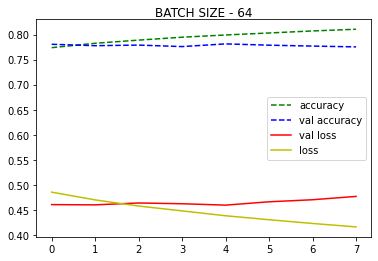

In [38]:
plt.plot(history.history['accuracy'],'g--', label='accuracy')
plt.plot(history.history['val_accuracy'],'b--', label='val accuracy')
plt.plot(history.history['val_loss'],'r', label='val loss')
plt.plot(history.history['loss'], 'y',label='loss')
plt.legend()
plt.title('BATCH SIZE - '+str(BATCH_SIZE), pad=-40)

Text(0.5, 1.0, 'BATCH SIZE - 32')

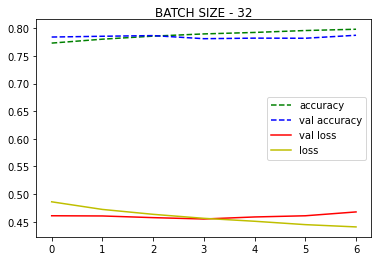

In [41]:
plt.plot(history.history['accuracy'],'g--', label='accuracy')
plt.plot(history.history['val_accuracy'],'b--', label='val accuracy')
plt.plot(history.history['val_loss'],'r', label='val loss')
plt.plot(history.history['loss'], 'y',label='loss')
plt.legend()
plt.title('BATCH SIZE - '+str(BATCH_SIZE), pad=-40)

# INPUT **PIPELINE**

In [50]:
# TRAINED MODEL 
TRAINED_MODEL_PATH_H5 = '/content/drive/MyDrive/Final year project/Model/trained_model_h5'
TRAINED_MODEL_PATH_TF = '/content/drive/MyDrive/Final year project/Model/trained_model_tf'
# loaded_model.save('/content/drive/MyDrive/Final year project/Model/trained_model_h5',save_format='h5')

#TRAINED MODEL WEIGHTS
TRAINED_MODEL_WEIGHT_H5 = '/content/drive/MyDrive/Final year project/Model/weight_h5.h5'
TRAINED_MODEL_WEIGHT_CHECKPOINT = '/content/drive/MyDrive/Final year project/Model/Weight_checkpoint/trained_model_weight_checkpoint'
# loaded_model.save_weights('/content/drive/MyDrive/Final year project/Model/weight_h5.h5')

In [53]:
def sentiment_predict(trained_model,input_data,tokenizer,):
  TRUNCAT_TYPE = 'post'
  PADDING_TYPE = 'post'
  MAX_SEQUENCE_LENGTH = 1000   
  text_seq = tokenizer.texts_to_sequences(input_data)
  text_padded = pad_sequences(text_seq, maxlen=MAX_SEQUENCE_LENGTH, padding=PADDING_TYPE, truncating=TRUNCAT_TYPE)
  pred_val=trained_model.predict(text_padded)
  pred_val=np.array(list(map(lambda x: x.argmax(),pred_val)))
  return pred_val



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

EMBEDDING_MATRIX_PATH = '/content/drive/MyDrive/Final year project/Datasets/Embedding/main_embedding_matrix_pickle'
MAX_NUM_WORDS = 20000
oov_tok = "<OOV>"  # OUT OF VOCABLARY
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token=oov_tok)
# TODO insert dataset in tokenizer to fit it
embedding_df= pd.read_pickle(EMBEDDING_MATRIX_PATH)
tokenizer.fit_on_texts(embedding_df.columns)
del embedding_df


from tensorflow.keras import models
new_model = models.load_model(TRAINED_MODEL_PATH_H5)

In [60]:
print(sentiment_predict(new_model,['raju enjoyed the party held at his office'],tokenizer))

[10]
